In [487]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#References to use
#https://www.kaggle.com/competitions/aiml-2223s1/data
#https://www.rasgoml.com/feature-engineering-tutorials/scikit-learn-time-series-split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
#https://towardsdatascience.com/time-series-from-scratch-train-test-splits-and-evaluation-metrics-4fd654de1b37
data=pd.read_csv('train.csv')
testdata=pd.read_csv('test.csv')
date=testdata.copy()#for sarimax
testdata_var=testdata.copy() #for varmax
data.head()

,Date,T,RH,Gas,Value,Unnamed: 5,Unnamed: 6
0,15/3/2016,12.020833,54.883334,CO,1053.200000,NaN,NaN
1,16/3/2016,9.833333,64.069791,CO,995.250000,NaN,NaN
2,17/3/2016,11.292708,51.107292,CO,1025.250000,NaN,NaN
3,18/3/2016,12.866319,51.530903,CO,1064.444444,NaN,NaN
4,19/3/2016,16.016667,48.843750,CO,1088.741667,NaN,NaN


In [488]:
testdata.head()

,id,Date,T,RH,Gas,Unnamed: 5,Unnamed: 6
0,0,6/2/2017,6.616667,51.734375,CO,NaN,NaN
1,1,7/2/2017,7.613194,43.930903,CO,NaN,NaN
2,2,8/2/2017,7.252083,50.966667,CO,NaN,NaN
3,3,9/2/2017,7.473611,50.166319,CO,NaN,NaN
4,4,10/2/2017,5.571875,46.604167,CO,NaN,NaN


In [489]:
#dropping unneeded columns
data=data.drop(['Unnamed: 5','Unnamed: 6'],axis=1)
testdata=testdata.drop(['Unnamed: 5','Unnamed: 6'],axis=1)
data

,Date,T,RH,Gas,Value
0,15/3/2016,12.020833,54.883334,CO,1053.200000
1,16/3/2016,9.833333,64.069791,CO,995.250000
2,17/3/2016,11.292708,51.107292,CO,1025.250000
3,18/3/2016,12.866319,51.530903,CO,1064.444444
4,19/3/2016,16.016667,48.843750,CO,1088.741667
...,...,...,...,...,...
1307,1/2/2017,5.267708,39.614930,O3,553.180556
1308,2/2/2017,-55.515972,-24.010417,O3,343.500000
1309,3/2/2017,-14.272917,28.563542,O3,334.458333
1310,4/2/2017,4.848611,37.832986,O3,379.513889


In [490]:
testdata

,id,Date,T,RH,Gas
0,0,6/2/2017,6.616667,51.734375,CO
1,1,7/2/2017,7.613194,43.930903,CO
2,2,8/2/2017,7.252083,50.966667,CO
3,3,9/2/2017,7.473611,50.166319,CO
4,4,10/2/2017,5.571875,46.604167,CO
...,...,...,...,...,...
247,247,5/4/2017,17.554167,50.092708,O3
248,248,6/4/2017,15.919792,35.959722,O3
249,249,7/4/2017,15.489583,32.213542,O3
250,250,8/4/2017,18.381250,33.686458,O3


In [491]:
data.describe()

,T,RH,Value
count,1312.000000,1312.000000,1312.000000
mean,11.634917,39.873729,750.218839
std,37.041779,43.217836,225.520132
min,-200.000000,-200.000000,-160.000000
25%,12.387760,36.348177,648.370833
50%,18.832292,46.078993,769.370833
75%,25.557118,57.932292,880.570833
max,32.997917,81.104167,1436.233333


In [492]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1312 non-null   object 
 1   T       1312 non-null   float64
 2   RH      1312 non-null   float64
 3   Gas     1312 non-null   object 
 4   Value   1312 non-null   float64
dtypes: float64(3), object(2)
memory usage: 51.4+ KB


In [493]:
testdata.describe()

,id,T,RH
count,252.000000,252.000000,252.000000
mean,125.500000,0.171065,37.655545
std,72.890329,43.988721,53.240082
min,0.000000,-200.000000,-200.000000
25%,62.750000,6.008333,40.696875
50%,125.500000,8.306944,49.393750
75%,188.250000,15.911806,56.788542
max,251.000000,18.951042,78.717709


In [494]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      252 non-null    int64  
 1   Date    252 non-null    object 
 2   T       252 non-null    float64
 3   RH      252 non-null    float64
 4   Gas     252 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 10.0+ KB


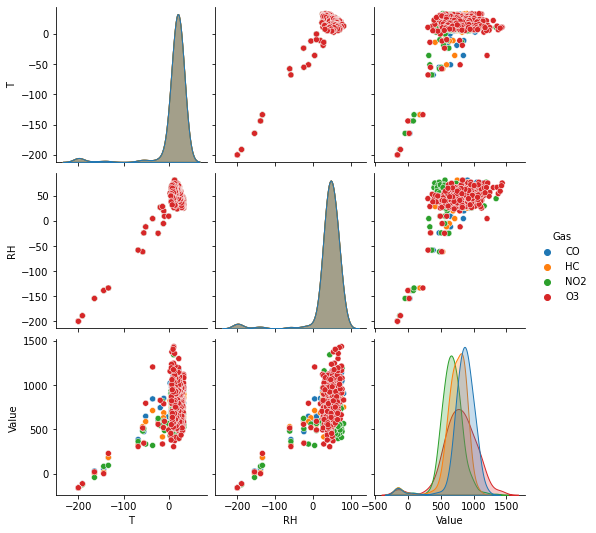

In [495]:
#correlation
sns.pairplot(data,hue='Gas')

<AxesSubplot:>

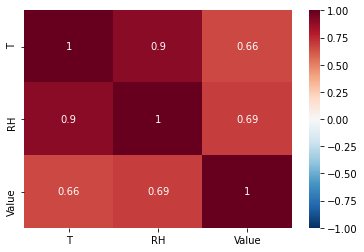

In [496]:
#correlation
corr=data.corr()
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)

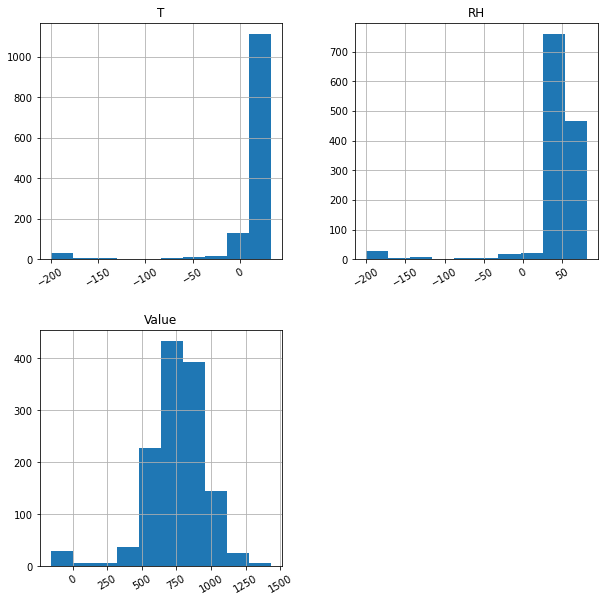

In [497]:
#outliers in t and rh
data.hist(figsize=(10,10),xrot=30)
plt.show()

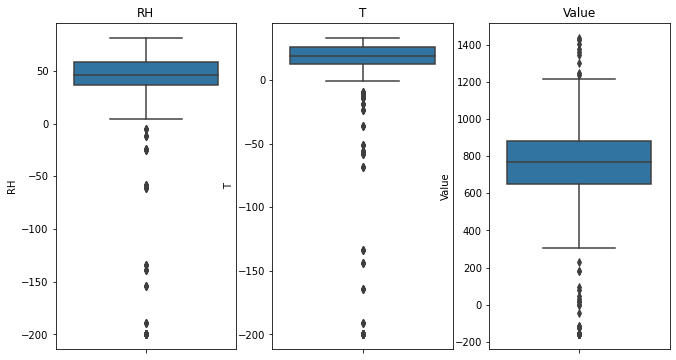

In [498]:
fig,axes=plt.subplots(1,3,sharey=False,figsize=(11,6))
sns.boxplot(y='RH',ax=axes[0],data=data)
axes[0].set_title('RH')
sns.boxplot(y='T',ax=axes[1],data=data)
axes[1].set_title('T')
sns.boxplot(y='Value',ax=axes[2],data=data)
axes[2].set_title('Value')
plt.show()


make index from object to datetime

In [499]:
# #Median for T above -89
# trainmedian_t = data['T'].median()

# #Median for RH above 0
# trainmedian_rh = data['RH'].median()

# #Median for Value above 0
# trainmean_value = data['Value'].mean()


# #Replace extreme outlier values for T below -89
# data["T"] = np.where(data["T"]<-89, trainmedian_t,data['T'])

# #Replace extreme outlier values for RH below 0
# data["RH"] = np.where(data["RH"]<0, trainmedian_rh,data['RH'])

# #Replace extreme outlier values for Value below 0
# data["Value"] = np.where(data["Value"]<0, trainmean_value,data['Value'])

In [500]:
#interpolation
navalues_t=data.index[data['T']<-89].to_numpy()
navalues_rh=data.index[data['RH']<2].to_numpy()
navalues_val=data.index[data['Value']<0].to_numpy()
navalues={'T':navalues_t,'RH':navalues_rh,'Value':navalues_val}

for i,a in navalues.items():
    data[i].iloc[a]=np.nan
    data[i].interpolate(method='linear',inplace=True)

c:\Users\N8VAN\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [501]:
data.index=pd.to_datetime(data.Date,format='%d/%m/%Y',)
testdata.index=pd.to_datetime(testdata.Date,format='%d/%m/%Y')
data=data.drop('Date',axis=1)
testdata=testdata.drop(['id','Date'],axis=1)
testdata_var=testdata.copy() #for varmax
test=data.copy()

<AxesSubplot:xlabel='T', ylabel='RH'>

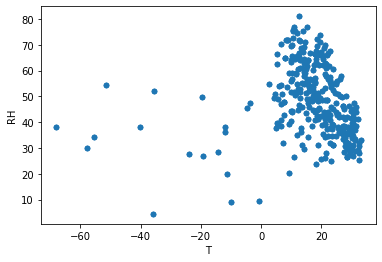

In [502]:
#outliers changed the correlation of all columns
data.plot.scatter('T','RH')

<AxesSubplot:>

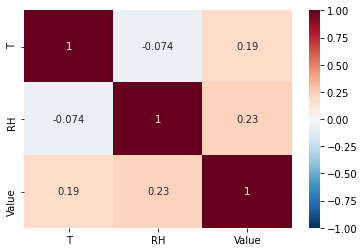

In [503]:
corr=data.corr()
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)

Data fields
Date - date
T - temperature
RH - relative humidity
Gas - type of pollution gas
Value - amount of pollution

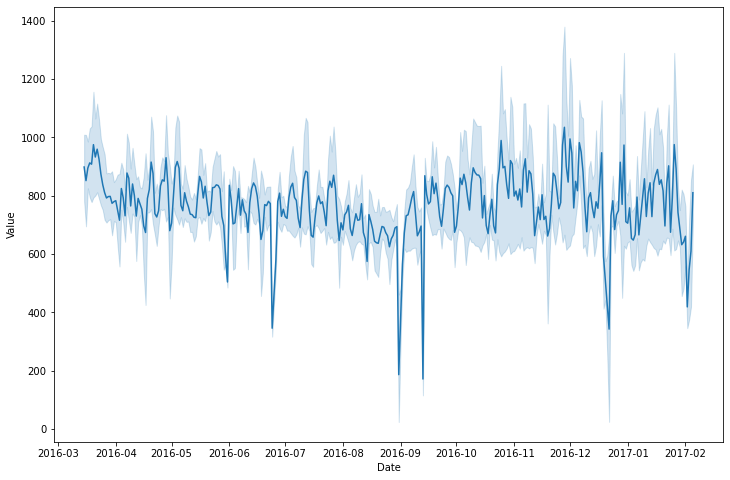

In [504]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.lineplot(x = data.index, y = 'Value' , data = data)
plt.show()


Finding logical cutoff of value as there are extreme outliers

Checking stationarity using dickey fuller test

In [505]:
from statsmodels.tsa.stattools import adfuller
df=data.copy()
df=df.drop(['T','RH','Gas'],axis=1)
df.sort_index(inplace=True)


In [506]:
adftest=adfuller(df)
if adftest[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

print('number of observation:',adftest[3],'\np-value:',adftest[1])

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
number of observation: 1306 
p-value: 9.228711640847593e-14


<h3> As the p-value is nearly 0 we reject null hypothesis, the data is not affected by time

seasonal does not icnrease in magnitude over time hence it is additive

<ipython-input-507-649022653677>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result=seasonal_decompose(df['Value'],model='additive',freq=7)


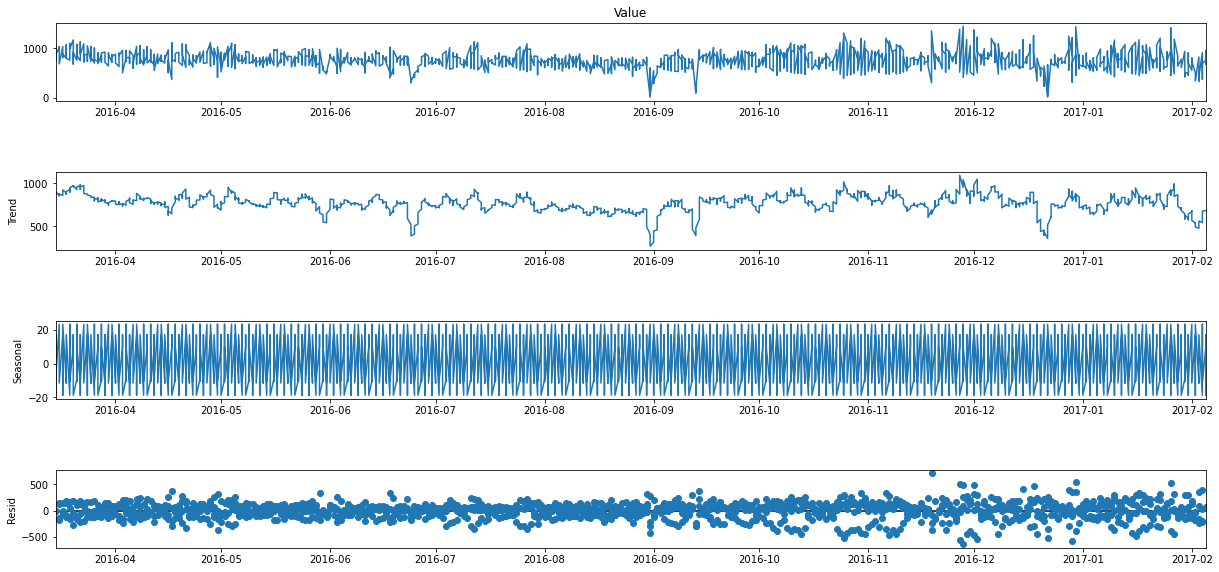

In [507]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['Value'],model='additive',freq=7)
fig=result.plot()
fig.set_size_inches((20, 9))
plt.show()

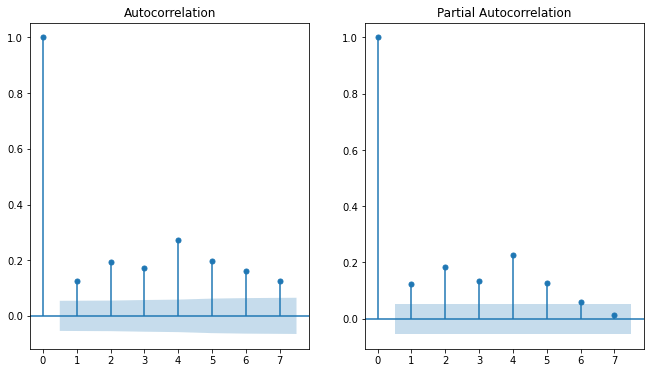

In [508]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig,axes=plt.subplots(1,2,sharey=False,figsize=(11,6))
plot_acf(df,lags=7,ax=axes[0])
plot_pacf(df,lags=7,ax=axes[1])
plt.show()
# hence p=2 acf for ma

<h3>Seasonality pacf and acf

c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


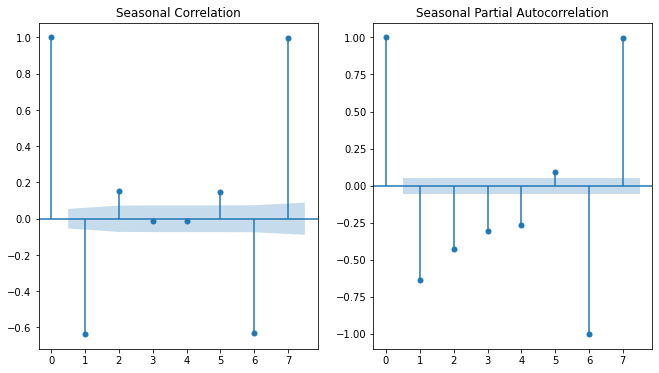

In [509]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig,axes=plt.subplots(1,2,sharey=False,figsize=(11,6))
plot_acf(result.seasonal,lags=7,ax=axes[0])
plot_pacf(result.seasonal,lags=7,ax=axes[1])
axes[0].set_title('Seasonal Correlation')
axes[1].set_title('Seasonal Partial Autocorrelation')
plt.show()

<h2>Feature Importance

ARIMA(p,d,q)

<h3> finding order of arima

<h2>Model

In [510]:
# start=len(data)
# #to get length 252
# end=len(data)+len(testdata)-1
# predicted=arima_model.predict(start=start,end=end,typ='levels')

# predicted.index=pd.to_datetime(testdata.Date,format='%d/%m/%Y')

In [511]:
data['Value'].describe()

count    1312.000000
mean      767.403077
std       182.634902
min        14.841667
25%       650.795833
50%       770.440278
75%       881.959028
max      1436.233333
Name: Value, dtype: float64

In [512]:
pivot=pd.pivot_table(data, values = 'Value', index=['T','RH','Date'], columns = ['Gas'])
pivot=pivot.reset_index(['T','RH'])
pivot

Gas,T,RH,CO,HC,NO2,O3
Date,,,,,,
2016-06-24,-68.069792,38.000694,385.402778,326.963889,362.972222,305.705556
2016-05-31,-57.951736,29.937153,489.027778,530.961111,480.750000,514.877778
2017-02-02,-55.515972,34.089236,474.291667,347.480556,508.180556,343.500000
2016-12-19,-51.363194,54.405208,648.391667,588.127778,333.647222,794.986111
2016-06-25,-40.109375,37.992014,496.197222,478.977778,461.769444,412.823611
...,...,...,...,...,...,...
2016-07-26,32.362847,30.812153,944.838889,846.550000,564.611111,957.844444
2016-07-12,32.380903,25.412500,934.011111,902.769444,578.241667,1121.600000
2016-07-13,32.473958,28.202083,966.108333,887.666667,557.941667,1107.191667


In [513]:
def get_date(e):
    e['dayofweek'] = e.index.day_of_week
    e['month'] = e.index.month
    e['year'] = e.index.year
    e['quarter'] = e.index.quarter


get_date(pivot)
get_date(data)
get_date(testdata_var)
get_date(testdata)

In [514]:
data

,T,RH,Gas,Value,dayofweek,month,year,quarter
Date,,,,,,,,
2016-03-15,12.020833,54.883334,CO,1053.200000,1,3,2016,1
2016-03-16,9.833333,64.069791,CO,995.250000,2,3,2016,1
2016-03-17,11.292708,51.107292,CO,1025.250000,3,3,2016,1
2016-03-18,12.866319,51.530903,CO,1064.444444,4,3,2016,1
2016-03-19,16.016667,48.843750,CO,1088.741667,5,3,2016,1
...,...,...,...,...,...,...,...,...
2017-02-01,5.267708,39.614930,O3,553.180556,2,2,2017,1
2017-02-02,-55.515972,34.089236,O3,343.500000,3,2,2017,1
2017-02-03,-14.272917,28.563542,O3,334.458333,4,2,2017,1


In [515]:
feat=data.copy()
feat=pd.get_dummies(feat,drop_first=True)
x_train=feat.drop(['Value'],axis=1).values
y_train=feat['Value'].values

<h3> Feature Importance

<AxesSubplot:>

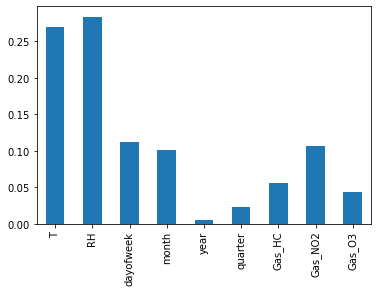

In [516]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
# summarize feature importance
model_featureimpt=pd.Series(model.feature_importances_,index=feat.drop(['Value'],axis=1).columns)

model_featureimpt.plot(kind='bar')
#having only 4 features might be too much of a removal, try 1807 tomorrow

<h3>Graph forecast


In [517]:
pivot.sort_index(ascending=True,inplace=True) 
pivot

Gas,T,RH,CO,HC,NO2,O3,dayofweek,month,year,quarter
Date,,,,,,,,,,
2016-03-15,12.020833,54.883334,1053.200000,729.800000,933.800000,876.833333,1,3,2016,1
2016-03-16,9.833333,64.069791,995.250000,681.441667,1021.750000,708.025000,2,3,2016,1
2016-03-17,11.292708,51.107292,1025.250000,806.583333,881.375000,867.375000,3,3,2016,1
2016-03-18,12.866319,51.530903,1064.444444,794.258333,794.527778,996.625000,4,3,2016,1
2016-03-19,16.016667,48.843750,1088.741667,755.083333,800.883333,987.341667,5,3,2016,1
...,...,...,...,...,...,...,...,...,...,...
2017-02-01,5.267708,39.614930,729.422222,562.650000,797.647222,553.180556,2,2,2017,1
2017-02-02,-55.515972,34.089236,474.291667,347.480556,508.180556,343.500000,3,2,2017,1
2017-02-03,-14.272917,28.563542,615.700000,414.475000,819.733333,334.458333,4,2,2017,1


In [518]:
data=pd.get_dummies(data,drop_first=True)

In [519]:
from pmdarima import auto_arima
auto= auto_arima(X=data[['T','RH','dayofweek','month','year','quarter','Gas_HC','Gas_NO2','Gas_O3']]
,y=data['Value'] ,m=7,trace=True)
auto.summary()

In [520]:
data

,T,RH,Value,dayofweek,month,year,quarter,Gas_HC,Gas_NO2,Gas_O3
Date,,,,,,,,,,
2016-03-15,12.020833,54.883334,1053.200000,1,3,2016,1,0,0,0
2016-03-16,9.833333,64.069791,995.250000,2,3,2016,1,0,0,0
2016-03-17,11.292708,51.107292,1025.250000,3,3,2016,1,0,0,0
2016-03-18,12.866319,51.530903,1064.444444,4,3,2016,1,0,0,0
2016-03-19,16.016667,48.843750,1088.741667,5,3,2016,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2017-02-01,5.267708,39.614930,553.180556,2,2,2017,1,0,0,1
2017-02-02,-55.515972,34.089236,343.500000,3,2,2017,1,0,0,1
2017-02-03,-14.272917,28.563542,334.458333,4,2,2017,1,0,0,1


<h1>SARIMAX

In [521]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Value'],order=(2,0,2),seasonal_order=(2,0,2,7),
exog=data[['T','RH','dayofweek','month','year','quarter','Gas_HC','Gas_NO2','Gas_O3']])
results=model.fit()
results.summary() 

c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

In [ ]:
testdata=pd.get_dummies(testdata,drop_first=True)

In [ ]:
testdata

,T,RH,dayofweek,month,year,quarter,Gas_HC,Gas_NO2,Gas_O3
Date,,,,,,,,,
2017-02-06,6.616667,51.734375,0,2,2017,1,0,0,0
2017-02-07,7.613194,43.930903,1,2,2017,1,0,0,0
2017-02-08,7.252083,50.966667,2,2,2017,1,0,0,0
2017-02-09,7.473611,50.166319,3,2,2017,1,0,0,0
2017-02-10,5.571875,46.604167,4,2,2017,1,0,0,0
...,...,...,...,...,...,...,...,...,...
2017-04-05,17.554167,50.092708,2,4,2017,2,0,0,1
2017-04-06,15.919792,35.959722,3,4,2017,2,0,0,1
2017-04-07,15.489583,32.213542,4,4,2017,2,0,0,1


In [ ]:
start=len(data)
#to get length 252
end=len(data)+len(testdata)-1
predicted_SAR=results.predict(start=start,end=end,exog=testdata[['T','RH','dayofweek','month','year','quarter','Gas_HC','Gas_NO2','Gas_O3']])

c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [ ]:
predicted_SAR.head(20)

1312    1038.991981
1313     909.663395
1314     891.267473
1315     911.955454
1316     889.107709
1317     756.166031
1318     903.396902
1319     603.016929
1320    -299.060231
1321    -290.120755
1322     -85.553862
1323     943.816263
1324     828.579449
1325     901.527201
1326     900.362656
1327     845.987077
1328     856.556700
1329     893.055886
1330     890.178136
1331     793.960110
Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

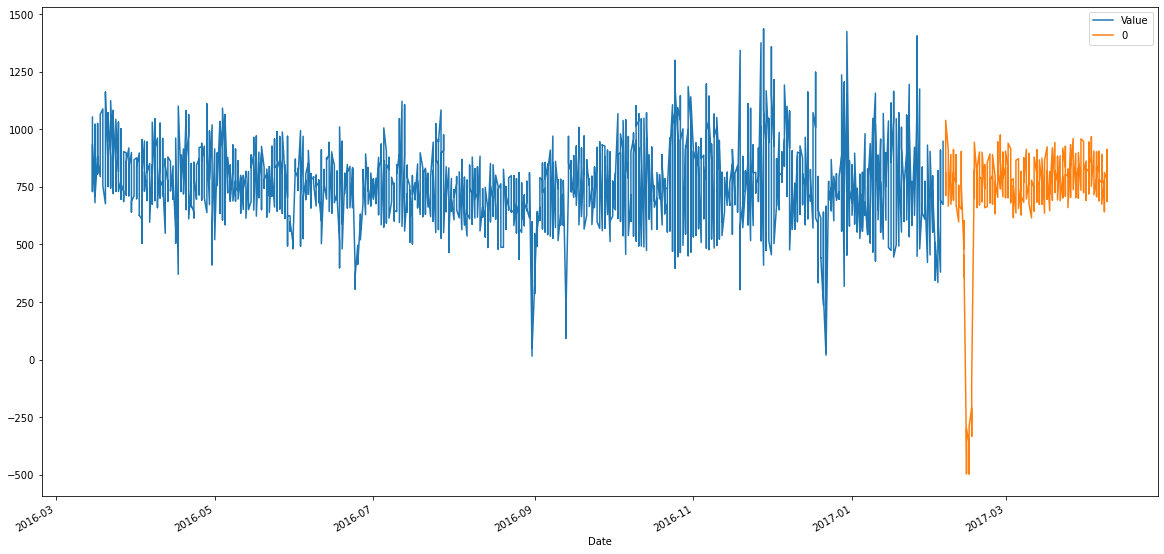

In [ ]:
predicted_df=pd.DataFrame(data=predicted_SAR.values,index=testdata.index)
predicted_list=[data,predicted_df]
df_plot=pd.concat(predicted_list)
df_plot[['Value',0]].plot(figsize=(20,10)) 

In [ ]:
predicted_=predicted_df.reset_index()
predicted = pd.DataFrame({"Value":predicted_[0]},index=date.id)
predicted.to_csv('results0809.csv')

<h1>Varmax

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
varmax=VARMAX(pivot[['CO','HC','NO2','O3']],order=(3,3),exog=pivot[['T','RH','dayofweek','month','year','quarter']]).fit()
varmax.summary()

c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Dep. Variable:,"['CO', 'HC', 'NO2', 'O3']",No. Observations:,328
Model:,"VARMAX(3,3)",Log Likelihood,-7580.339
,+ intercept,AIC,15428.678
Date:,"Fri, 12 Aug 2022",BIC,15936.942
Time:,21:36:01,HQIC,15631.461
Sample:,03-15-2016,,
,- 02-05-2017,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.37, 0.66, 0.00, 0.03",Jarque-Bera (JB):,"1793.38, 2083.97, 3558.14, 9279.43"
Prob(Q):,"0.54, 0.42, 0.99, 0.85",Prob(JB):,"0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"2.47, 2.67, 2.40, 3.44",Skew:,"-1.46, -0.63, -0.47, 3.05"


<h2>testdata data processing

In [ ]:
testdata_var['NA']=0
labels=testdata.copy()
pivot_t=pd.pivot_table(testdata_var, values = 'NA', index=['Date','T','RH','dayofweek','month','year','quarter'], columns = ['Gas'])
pivot_t=pivot_t.reset_index(['T','RH','dayofweek','month','year','quarter'])
pivot_t.sort_index(ascending=True,inplace=True) # put in separate var because it messes up sarima if i sort data

In [ ]:
start=len(pivot)
#to get length 252
end=len(pivot)+len(pivot_t)-1
predicted_=varmax.predict(start=start,end=end,exog=pivot_t[['T','RH','dayofweek','month','year','quarter']])

# predicted_.index=pd.to_datetime(labels.index,format='%d/%m/%Y')


c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [ ]:
labels.index

DatetimeIndex(['2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
               '2017-02-14', '2017-02-15',
               ...
               '2017-03-31', '2017-04-01', '2017-04-02', '2017-04-03',
               '2017-04-04', '2017-04-05', '2017-04-06', '2017-04-07',
               '2017-04-08', '2017-04-09'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [ ]:
predicted_=pd.melt(predicted_)
predicted_.index=labels.index


<AxesSubplot:xlabel='Date'>

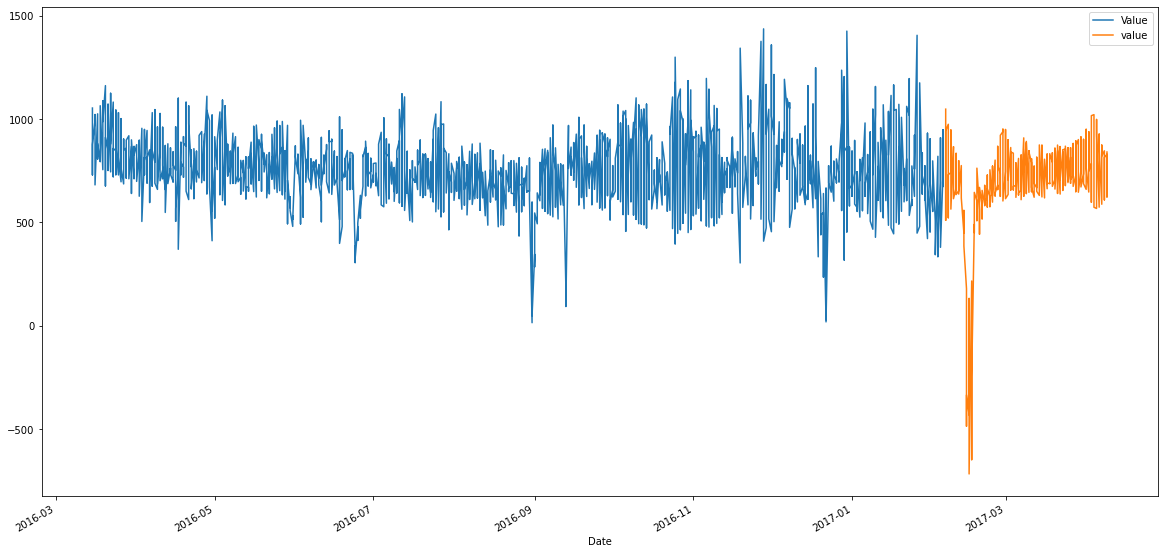

In [ ]:
predicted_df=pd.DataFrame(data=predicted_['value'],index=predicted_.index)
listt_predicted=[df,predicted_df]
df=pd.concat(listt_predicted)
df[['Value','value']].plot(figsize=(20,10)) 

In [ ]:
df

,Value,value
Date,,
2016-03-15,1053.200000,NaN
2016-03-15,933.800000,NaN
2016-03-15,729.800000,NaN
2016-03-15,876.833333,NaN
2016-03-16,995.250000,NaN
...,...,...
2017-04-05,NaN,997.891130
2017-04-06,NaN,927.288813
2017-04-07,NaN,874.111942


In [ ]:
predicted_.head(30)
# predicted drop true makes data predict a lower score

,variable,value
Date,,
2017-02-06,CO,942.323958
2017-02-07,CO,910.685588
2017-02-08,CO,906.405698
2017-02-09,CO,864.520209
2017-02-10,CO,834.050610
2017-02-11,CO,798.501761
2017-02-12,CO,774.871483
2017-02-13,CO,448.441232
2017-02-14,CO,-485.777438


Forecasting

In [ ]:
predicted_=predicted_.reset_index()
predicted = pd.DataFrame({"Value":predicted_['value']},index=date.id)
predicted.to_csv('results_var_0808.csv')
# predicted.to_csv('results200702.csv')
# results200702 added time variables and removed scaling

In [ ]:
data

,T,RH,Value,dayofweek,month,year,quarter,Gas_HC,Gas_NO2,Gas_O3
Date,,,,,,,,,,
2016-03-15,12.020833,54.883334,1053.200000,1,3,2016,1,0,0,0
2016-03-16,9.833333,64.069791,995.250000,2,3,2016,1,0,0,0
2016-03-17,11.292708,51.107292,1025.250000,3,3,2016,1,0,0,0
2016-03-18,12.866319,51.530903,1064.444444,4,3,2016,1,0,0,0
2016-03-19,16.016667,48.843750,1088.741667,5,3,2016,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2017-02-01,5.267708,39.614930,553.180556,2,2,2017,1,0,0,1
2017-02-02,-55.515972,34.089236,343.500000,3,2,2017,1,0,0,1
2017-02-03,-14.272917,28.563542,334.458333,4,2,2017,1,0,0,1


In [ ]:
pivot

Gas,T,RH,CO,HC,NO2,O3,dayofweek,month,year,quarter
Date,,,,,,,,,,
2016-03-15,12.020833,54.883334,1053.200000,729.800000,933.800000,876.833333,1,3,2016,1
2016-03-16,9.833333,64.069791,995.250000,681.441667,1021.750000,708.025000,2,3,2016,1
2016-03-17,11.292708,51.107292,1025.250000,806.583333,881.375000,867.375000,3,3,2016,1
2016-03-18,12.866319,51.530903,1064.444444,794.258333,794.527778,996.625000,4,3,2016,1
2016-03-19,16.016667,48.843750,1088.741667,755.083333,800.883333,987.341667,5,3,2016,1
...,...,...,...,...,...,...,...,...,...,...
2017-02-01,5.267708,39.614930,729.422222,562.650000,797.647222,553.180556,2,2,2017,1
2017-02-02,-55.515972,34.089236,474.291667,347.480556,508.180556,343.500000,3,2,2017,1
2017-02-03,-14.272917,28.563542,615.700000,414.475000,819.733333,334.458333,4,2,2017,1


<h2>Model Evaluation

TimeSeriesSplit assumes that the data contains a single series with evenly spaced observations ordered by the timestamp. With that data it partitions the first n observations into the train set and the remaining test_size into the test set.

<h3>Sarimax

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

tss_s = TimeSeriesSplit()
X_s = data.drop(labels=['Value'], axis=1)
y_s = data['Value']

In [ ]:
for train_index, test_index in tss_s.split(X_s):
    #features
    X_train, X_test = X_s.iloc[train_index, :], X_s.iloc[test_index,:]
    #target
    y_train, y_test = y_s.iloc[train_index], y_s.iloc[test_index]


In [ ]:
X_train

,T,RH,dayofweek,month,year,quarter,Gas_HC,Gas_NO2,Gas_O3
Date,,,,,,,,,
2016-03-15,12.020833,54.883334,1,3,2016,1,0,0,0
2016-03-16,9.833333,64.069791,2,3,2016,1,0,0,0
2016-03-17,11.292708,51.107292,3,3,2016,1,0,0,0
2016-03-18,12.866319,51.530903,4,3,2016,1,0,0,0
2016-03-19,16.016667,48.843750,5,3,2016,1,0,0,0
...,...,...,...,...,...,...,...,...,...
2016-06-28,27.218750,36.509375,1,6,2016,2,0,0,1
2016-06-29,27.800695,41.325694,2,6,2016,2,0,0,1
2016-06-30,27.879167,33.700000,3,6,2016,2,0,0,1


In [ ]:
X_test.index

DatetimeIndex(['2016-07-03', '2016-07-04', '2016-07-05', '2016-07-06',
               '2016-07-07', '2016-07-08', '2016-07-09', '2016-07-10',
               '2016-07-11', '2016-07-12',
               ...
               '2017-01-27', '2017-01-28', '2017-01-29', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-04', '2017-02-05'],
              dtype='datetime64[ns]', name='Date', length=218, freq=None)

In [ ]:
model=sm.tsa.statespace.SARIMAX(y_train.values,order=(2,0,2),seasonal_order=(2,0,2,7),
exog=X_train[['T','RH','dayofweek','month','year','quarter','Gas_HC','Gas_NO2','Gas_O3']])
results=model.fit()
start=len(X_train)
#to get length 252
end=len(X_train)+len(X_test)-1
predicted=results.predict(start=start,end=end,exog=X_test[['T','RH','dayofweek','month','year','quarter','Gas_HC','Gas_NO2','Gas_O3']])

c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

In [ ]:
mse=mean_squared_error(y_test,predicted)
rmse=np.sqrt(mse)
print(f'MSE:{mse}\nrmse:{rmse}')

MSE:62036.079925438426
rmse:249.0704316562655


In [ ]:
predicted.describe()

count    218.000000
mean     738.401438
std       59.751307
min      472.391922
25%      712.800296
50%      743.995493
75%      777.166812
max      841.693028
Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

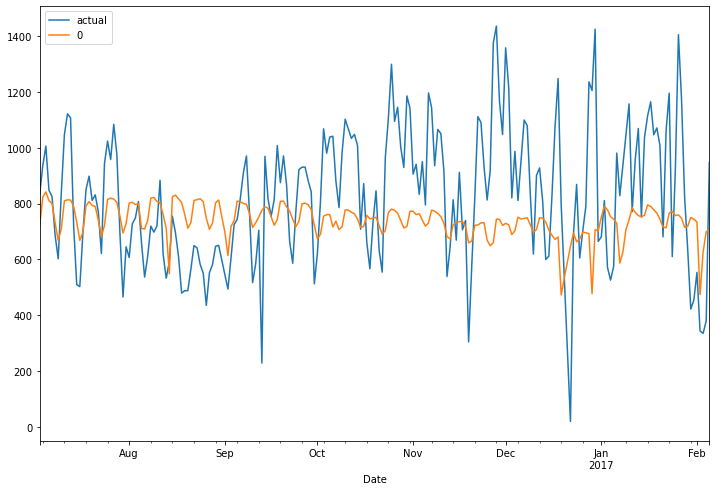

In [ ]:
predicted_df=pd.DataFrame(data=predicted.values,index=y_test.index) #predicted 
predicted_df.insert(1,"actual",y_test)
predicted_df[['actual',0]].plot(figsize=(12,8))


<h3>VARMAX

In [ ]:
tss = TimeSeriesSplit()
X_v = pivot.drop(labels=['CO','HC','NO2','O3'], axis=1)
y_v = pivot[['CO','HC','NO2','O3']]

In [ ]:
for train_index, test_index in tss.split(X_v):
    X_train, X_test = X_v.iloc[train_index, :], X_v.iloc[test_index,:]
    y_train, y_test = y_v.iloc[train_index], y_v.iloc[test_index]
    

In [ ]:
varmax=VARMAX(y_train[['CO','HC','NO2','O3']],order=(3,3),exog=X_train[['T','RH','dayofweek','month','year','quarter']]).fit()


c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
start=len(X_train)
#to get length 252
end=len(X_train)+len(X_test)-1
predicted_=varmax.predict(start=start,end=end,exog=X_test[['T','RH','dayofweek','month','year','quarter']])

c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
c:\Users\N8VAN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [ ]:
predicted_.describe()

,CO,HC,NO2,O3
count,54.000000,54.000000,54.000000,54.000000
mean,881.881255,734.154689,716.653954,786.812084
std,104.701953,79.912594,119.844031,69.751037
min,568.527492,499.957285,447.677145,608.939323
25%,818.287561,687.514620,607.831353,758.788708
50%,904.242434,735.246239,772.745772,805.446970
75%,974.071338,798.930292,810.554515,832.117712
max,1030.504556,851.491333,868.996061,882.216691


In [ ]:
mse=mean_squared_error(y_test,predicted_)
rmse=np.sqrt(mse)
print(f'MSE:{mse}\nrmse:{rmse}')

MSE:46883.2356419892
rmse:216.5253695112635


In [ ]:
predicted_var=pd.melt(predicted_,ignore_index=False)

In [ ]:
predicted_var['value'].describe()

count     216.000000
mean      779.875496
std       114.764469
min       447.677145
25%       720.906213
50%       793.467684
75%       837.318952
max      1030.504556
Name: value, dtype: float64

In [ ]:
y_test=pd.melt(y_test,ignore_index=False)

In [ ]:
y_test

,Gas,value
Date,,
2016-12-14,CO,747.341667
2016-12-15,CO,700.541667
2016-12-16,CO,798.291667
2016-12-17,CO,927.616667
2016-12-18,CO,1006.691667
...,...,...
2017-02-01,O3,553.180556
2017-02-02,O3,343.500000
2017-02-03,O3,334.458333


<AxesSubplot:>

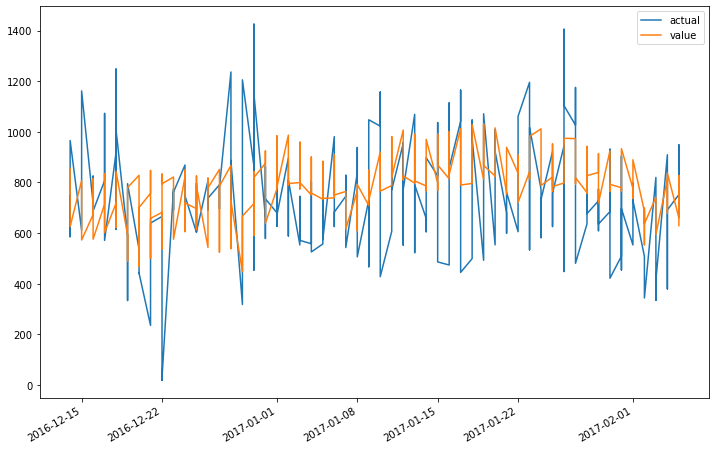

In [ ]:

predicted_var.insert(2,"actual",y_test.value)
predicted_var[['actual','value']].plot(figsize=(12,8))